# Discrete Distributions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random

## Bernoulli distribution

The simplest discrete distribution. It has the following proporties:
- Only two possibles outcomes (success and failuer)
- The probability of success remains and constants (p)
- The events are independent

In [2]:
#function from getting bernoulli
def bernoulli(p):
    """
    Docstring:
    Description: function to get a bernoulli
    input: p:  probability
    output: a 1 or 0 that means if True or False
    """
    #create a random number between 0 and 1
    r = np.random.random()
    #check if the number is less or equal than probability
    if r <= p:
        return 1
    else:
        return 0

In [3]:
bernoulli(1/2)

1

In [4]:
#function for bernoulli distribution
def bernoulli_dist(p, size=1):
    """
    Docstring: function to get a bernoulli distribution
    input: p is probability, size is the size of the sample
    outplut: return an array of 0 and 1
    """
    sample = []
    
    #range that makes an array of probabilities created
    for i in range(size):
        sample.append(bernoulli(p))
        
    return np.array(sample)

In [5]:
#creating an array of bernoulli dist
sample_data = bernoulli_dist(0.8,100000)

(array([19834.,     0., 80166.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

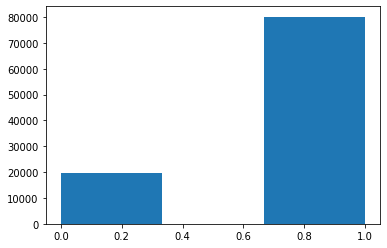

In [6]:
#plotting the bernoulli dist made
plt.hist(sample_data, range=(0,1), bins = 3 )

### Expectative and variance
$E(x) = \sum(x\cdot f_X(x))$

$\sigma_x^2 = E(x^2)-E(x)^2$

In [7]:
#getting the expectative
data_expectative = sample_data.mean()
#getting the varianece
data_variance = sample_data.var()
p = .8

In [8]:
print("sample mean: ",data_expectative,"sample variance: ",data_variance)
print("Exact mean: ", p, "Exact variance: ",p*(1-p))

sample mean:  0.80166 sample variance:  0.15900124440000002
Exact mean:  0.8 Exact variance:  0.15999999999999998


## Binomial Distribution
The binomial distribution describes the probability of having $x$ successes in $n$ Bernoulii trials with a success chance of $p$

In [9]:
#variable declaration
p = 0.2
size = 20
sample_data = bernoulli_dist(p, size)
print(sample_data)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
sample_data.sum()

2

In [11]:
#function for creating binomial distribution
def binomial(n, p, size=1):
    """
    Docstring: function to create a binomial distribution
    Input: n times of exit, p is probability and size is the size of the sample
    output: an array that contains numbers that are the exits by each iteration of the for
    """
    sample = []
    
    for i in range(size):
        sample.append(bernoulli_dist(p, n).sum())
        
    return np.array(sample)

In [12]:
p = 0.2
n = 10
size = 10000
sample_data = binomial(n, p , size)
print(sample_data)

[1 0 1 ... 1 1 2]


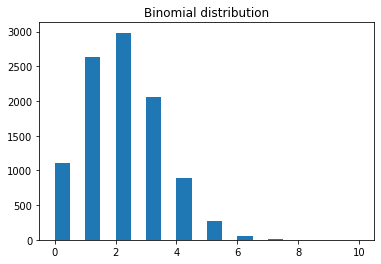

In [13]:
plt.hist(sample_data, range = (0,n), bins=2*n )
plt.title("Binomial distribution")
plt.show()

In [14]:
exact = []
for x in range(n+1):
    c = math.factorial(n)/(math.factorial(n-x)*math.factorial(x))
    exact.append(c*math.pow(p,x)*math.pow(1-p,n-x)*size)

## Poisson Distribution
* lambda: average value of the sample
* n: lenght of the sample
* size: number of sample

In [15]:
lambda_value = 1
size = 100

### Algotithm
* calculate the corresponding p
* Do the "site" thus
 ###### binomial distribution sample with (n,p)
 ######  append it to sample array
 ###### return sample array

In [16]:
def poisson(l, size=1, n=1000):
    """
    Docstring: function to get the poisson
    input: l is lambda, size is the size of the sample, n times of exits
    output: an array that contains numbers that are the exits by each iteration of the for
    """
    p = l/n
    sample = []
    #for to repit the size
    for i in range(size):
        sample.append(binomial(n,p).sum())
        
    return np.array(sample)
    

In [17]:
l = 4
n = 10
size = 1000

sample_data = poisson(l,size, n)
sample_data2 = poisson(l,size)

In [18]:
sample_data

array([5, 3, 3, 5, 7, 7, 2, 5, 4, 3, 4, 2, 4, 2, 8, 2, 1, 3, 7, 5, 4, 1,
       3, 0, 3, 5, 4, 8, 3, 8, 6, 3, 3, 7, 3, 4, 7, 4, 2, 5, 5, 4, 6, 5,
       4, 2, 5, 2, 6, 2, 5, 3, 3, 3, 7, 5, 4, 5, 4, 4, 3, 3, 2, 6, 1, 4,
       1, 3, 2, 3, 6, 3, 4, 5, 4, 5, 3, 5, 5, 4, 4, 4, 2, 7, 3, 3, 2, 2,
       4, 7, 5, 1, 2, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 6, 3, 1, 5, 5, 3, 7,
       3, 4, 3, 4, 2, 4, 6, 7, 3, 4, 5, 3, 2, 6, 5, 8, 5, 3, 2, 4, 4, 6,
       5, 5, 4, 4, 3, 5, 4, 4, 5, 3, 4, 4, 8, 4, 8, 4, 5, 1, 4, 2, 2, 3,
       4, 7, 6, 3, 1, 3, 6, 4, 2, 2, 2, 4, 4, 3, 2, 6, 5, 4, 3, 2, 4, 7,
       1, 4, 5, 2, 5, 5, 1, 4, 4, 3, 3, 5, 4, 4, 1, 3, 4, 5, 5, 1, 2, 3,
       4, 4, 4, 3, 4, 3, 5, 4, 3, 7, 2, 6, 5, 2, 5, 4, 7, 5, 2, 5, 3, 1,
       4, 3, 5, 5, 6, 4, 2, 5, 5, 2, 5, 3, 3, 5, 5, 6, 4, 6, 4, 3, 4, 6,
       5, 4, 5, 2, 5, 4, 4, 6, 6, 2, 3, 2, 0, 1, 4, 8, 6, 5, 6, 2, 5, 4,
       2, 2, 5, 3, 5, 5, 5, 5, 5, 2, 4, 6, 4, 3, 3, 6, 6, 5, 2, 3, 3, 5,
       4, 2, 4, 1, 3, 6, 2, 3, 4, 5, 2, 5, 5, 3, 3,

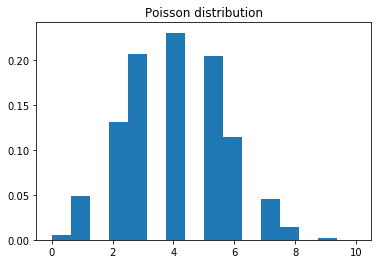

In [19]:
plt.hist(sample_data, range = (0,10), bins = 4*l, weights = [1/size]*size)
plt.title("Poisson distribution")
plt.show()

# Homework

# Negative binomial distribution

In [20]:
def bernoulli_dist1(p, n):
    """
    Docstring: function to get the bernoulli distribution for negative binomial
    input: p is probability, n number of fail
    output: return an array of only zeros
    """
    sample = []
    #loop til get the number of fail
    while True:
        sample.append(bernoulli(p))
        #check if it get the fail requiered
        if sum(sample) == n:
            break
            
    #returning an array of only 0
    return [x for x in sample if x == 0]

In [21]:
def negative_binomial(n , p, size):
    """
    Docstring: function to get the negative binomial
    input: n number of fail, p is probability, size is the size of the ssample
    output:an array that contains numbers that are the exits by each iteration of the for
    """
    sample = []
    for i in range(size):
        sample.append(len(bernoulli_dist1(p, n)))
        
    return np.array(sample)

In [22]:
p = .25
n = 10
size = 10000

sample1 = negative_binomial(n,p ,size)
sample1

array([31, 43, 32, ..., 39, 28, 36])

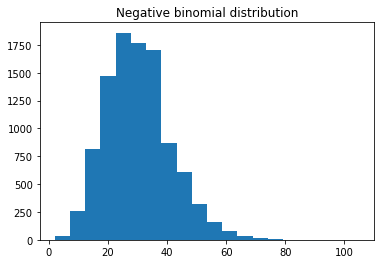

In [23]:
plt.hist(sample1, bins=20 )
plt.title("Negative binomial distribution")
plt.show()

# Geometric distribution 

In [24]:
def geometric(p , size = 100):
    """
    Docstring: function to get the geometric binomial
    input: p is probability, size is the size of the sample, there is not n because in the geometric
    finish in the first exit 
    output: an array with the number of exits,0.
    """
    #since its geometric n must be equal to 0, and actually is a negative binomial
    n = 1
    result = negative_binomial(n , p, size)
    return result

In [25]:
p = .35
size = 100

sample2 = geometric (p, size)

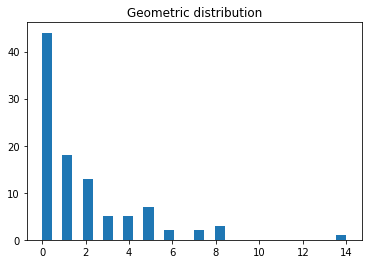

In [26]:
plt.hist(sample2, bins = 30)
plt.title("Geometric distribution")
plt.show()

## Hypergeometric Distribution

In [27]:
def hypergeometric(M,N, n=1,size=1):
    """
    Docstring: function to get the hypergeometric binomial
    input: M is the total number of objects, N is the number of special objects
    output: an array that contains numbers that are the exits by each iteration of the for
    """
    sample = [1]*M
    sample = sample + [0]*(N-M)
    result = []
    for i in range(size):
        random.shuffle(sample)
        result.append(sum(sample[:n]))
    return result

In [28]:
M = 20
N = 100
size = 1000
n = 20
list1 = hypergeometric(M, N, n, size)

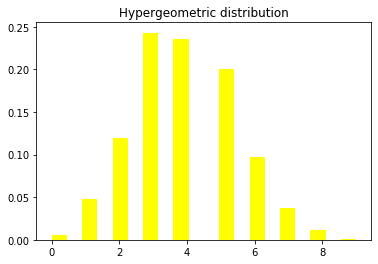

In [29]:
plt.hist(list1, bins = n, color = 'yellow', weights =[1/size]*size)
plt.title("Hypergeometric distribution")
plt.show()

# Homework finished

### combinatories

In [30]:
def comb(n ,x):
    """
    Docstring: function to get a combinatory
    input: n objects for combainin, x ways of combaining
    output: a combinatory
    """
    #getting the numerator
    numer = math.factorial(n)
    #getting the denominator
    denom = math.factorial(x)*math.factorial(n-x)
    return int(numer / denom)

In [31]:
def realhypergeo(N, M, n):
    """
    Docstring:getts the real hyper geometric
    input: N number of special objects, M total objects, n is the number of objects you are looking
    output: an arrat with the number of appearings
    """
    xmax = min(n,M)
    xmin = max(0,n+M-N)
    p_vals = []
    for x in range(xmin,xmax+1):
        p = comb(M,x)*comb(N-M, n-x)/comb(N,n)
        p_vals.append(p)
    return [list(range(xmin,xmax+1)),p_vals]

In [32]:
realdata = realhypergeo(N,M,n)

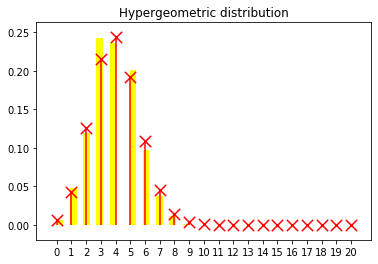

In [33]:
plt.hist(list1, bins = n, color = 'yellow', weights =[1/size]*size)
plt.title("Hypergeometric distribution")
plt.xticks(range(n+1))
plt.scatter(realdata[0], realdata[1], color = 'red', zorder = 3, s=128, marker='x')
plt.vlines(realdata[0], 0,realdata[1], color = 'red')
plt.show()

## Fitting a binomial distribution: moments

The first two moments of the binomial distributions are related to the mean and variance in the followung manner:

$$\mu_x = n \cdot p$$
$$\sigma_x^2 = n \cdot p \cdot (1-p)$$

If we want to fit a binomial distribution to a set of dara, we need to find a way to determine the characteristics values of the binomial distribution($n,$p) based in statistical measurable quantities (mean and variance). Therefore, we can use the expressions above to reach our goal
$$\mu_x = n \cdot p \rightarrow  n = \mu_x / p$$
$$\sigma_x^2 = n \cdot (1-p) \rightarrow \sigma_x^2 = (\mu_x / p) \cdot (1-p) \rightarrow \sigma_x^2 = \mu_x \cdot (1-p)$$
$$\therefore p = 1 - \sigma_x^2 / \mu_x $$

$$n = \mu_x / p \rightarrow n = \mu_x/(1-\sigma_x^2 / \mu_x) \rightarrow n = \mu_x/((\mu_x - \sigma_x^2)/\mu_x)$$
$$\therefore n = n = \mu_x^2 / (\mu_x - \sigma_x^2)$$

whit this new two expressions, we can calculate the mean and standard deviation of our data and fit a binomial distribution to it.